<a href="https://colab.research.google.com/github/shahjamanbadhon/Data-Mining/blob/main/LSTM_DataMining_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np

In [62]:
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [63]:
window = 3
data2 = []
x1 = []
target1 = []
for i in range(len(data) - window):
    x = data[i : i + window]
    x1.append(x)
    target = data[i + window]
    target1.append(target)


In [64]:
x = np.array(x1)
y = np.array(target1)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten


In [68]:
x.shape

(7, 3, 1)

In [66]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [70]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(window, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=300, verbose=1)

Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 5151.7583
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 5125.1987
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 5096.1064
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 5064.3296
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5029.5210
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4991.1729
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4948.8179
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4901.9619
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4849.8057
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4791.2661
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4725.3550
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4650.6313
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4565.3330
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4466.5981
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - lo

In [81]:
x_input = np.array([80, 90, 100])
temp_input = list(x_input)
lst_output = []
i = 0

while i < 7:
  x_input = np.array(temp_input[-window:])
  print("{}day input {}".format(i, x_input))
  x_input = x_input.reshape((1, window, 1))
  yhat = model.predict(x_input, verbose=0)
  print("{}day output {}".format(i, yhat))
  temp_input.append(yhat[0][0])
  temp_input = temp_input[1:]
  lst_output.append(yhat[0][0])
  i += 1

0day input [ 80  90 100]
0day output [[112.068954]]
1day input [ 90.         100.         112.06895447]
1day output [[123.460495]]
2day input [100.         112.06895447 123.460495  ]
2day output [[135.7521]]
3day input [112.068954 123.460495 135.7521  ]
3day output [[149.62431]]
4day input [123.460495 135.7521   149.62431 ]
4day output [[163.57188]]
5day input [135.7521  149.62431 163.57188]
5day output [[178.92235]]
6day input [149.62431 163.57188 178.92235]
6day output [[195.74532]]


In [83]:
lst_output

[np.float32(112.068954),
 np.float32(123.460495),
 np.float32(135.7521),
 np.float32(149.62431),
 np.float32(163.57188),
 np.float32(178.92235),
 np.float32(195.74532)]

In [85]:
import matplotlib.pyplot as plt

In [97]:
day = np.arange(8,15)

In [98]:
day

array([ 8,  9, 10, 11, 12, 13, 14])

In [99]:
target1

[40, 50, 60, 70, 80, 90, 100]

In [100]:
combine = np.concatenate((day, lst_output))
combine

array([  8.        ,   9.        ,  10.        ,  11.        ,
        12.        ,  13.        ,  14.        , 112.06895447,
       123.460495  , 135.75210571, 149.62431335, 163.57188416,
       178.92234802, 195.74531555])

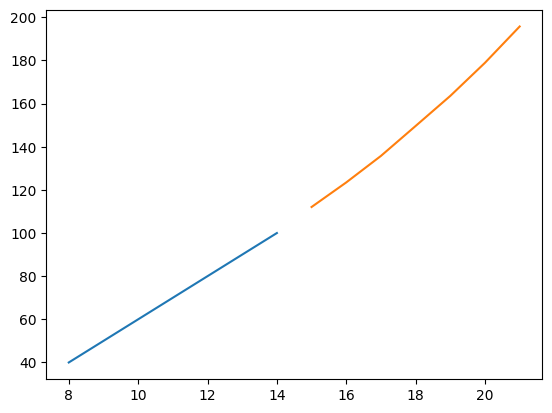

In [105]:
plt.plot(day, target1)
predicted_days = np.arange(day[-1] + 1, day[-1] + 1 + len(lst_output))
plt.plot(predicted_days, lst_output)
plt.show()